In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
url = "https://gist.githubusercontent.com/stephenturner/806e31fce55a8b7175af/raw/1a507c4c3f9f1baaa3a69187223ff3d3050628d4/results.txt"
df = pd.read_csv(url, sep = '/t', engine='python')
df.head()

,Gene log2FoldChange pvalue padj
0,DOK6 0.51 1.861e-08 0.0003053
1,TBX5 -2.129 5.655e-08 0.0004191
2,SLC32A1 0.9003 7.664e-08 0.0004191
3,IFITM1 -1.687 3.735e-06 0.006809
4,NUP93 0.3659 3.373e-06 0.006809


In [3]:
df.shape

(16406, 1)

In [4]:
df.columns

Index(['Gene log2FoldChange pvalue padj'], dtype='object')

In [5]:
df_split = df['Gene log2FoldChange pvalue padj'].str.split(' ', expand=True)

# Assign meaningful column names
df_split.columns = ['Gene', 'log2FC', 'pvalue', 'padj']

df_split.head()

,Gene,log2FC,pvalue,padj
0,DOK6,0.51,1.861e-08,0.0003053
1,TBX5,-2.129,5.655e-08,0.0004191
2,SLC32A1,0.9003,7.664e-08,0.0004191
3,IFITM1,-1.687,3.735e-06,0.006809
4,NUP93,0.3659,3.373e-06,0.006809


In [6]:
df = df_split

df.shape

(16406, 4)

In [7]:
df.dtypes

Gene      object
log2FC    object
pvalue    object
padj      object
dtype: object

In [8]:
# Convert numeric columns to appropriate data types
df["log2FC"] = pd.to_numeric(df["log2FC"], errors='coerce')
df["pvalue"] = pd.to_numeric(df["pvalue"], errors='coerce')
df["padj"] = pd.to_numeric(df["padj"], errors='coerce')

# Drop any rows with NaN values (if conversion failed for any row)
df.dropna(inplace=True)

df.dtypes

Gene       object
log2FC    float64
pvalue    float64
padj      float64
dtype: object

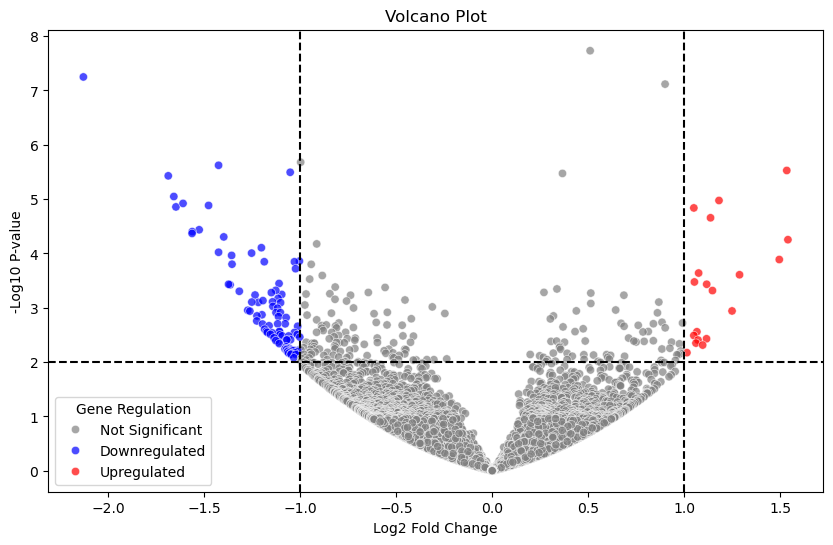

In [9]:
# Set significance thresholds
log2fc_threshold = 1
pvalue_threshold = 0.01

# Define gene categories for color mapping
df["category"] = "Not Significant"
df.loc[(df["log2FC"] > log2fc_threshold) & (df["pvalue"] < pvalue_threshold), "category"] = "Upregulated"
df.loc[(df["log2FC"] < -log2fc_threshold) & (df["pvalue"] < pvalue_threshold), "category"] = "Downregulated"

# Plot the volcano plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df["log2FC"], 
    y=-np.log10(df["pvalue"]), 
    hue=df["category"], 
    palette={"Upregulated": "red", "Downregulated": "blue", "Not Significant": "gray"},
    alpha=0.7
)

# Add cutoff lines
plt.axvline(x=log2fc_threshold, linestyle="--", color="black")  
plt.axvline(x=-log2fc_threshold, linestyle="--", color="black")  
plt.axhline(y=-np.log10(pvalue_threshold), linestyle="--", color="black")  

# Labels and title
plt.xlabel("Log2 Fold Change")
plt.ylabel("-Log10 P-value")
plt.title("Volcano Plot")
plt.legend(title="Gene Regulation")
plt.show()

In [10]:
# Get upregulated and downregulated genes
upregulated = df[(df["log2FC"] > 1) & (df["pvalue"] < 0.01)]
downregulated = df[(df["log2FC"] < -1) & (df["pvalue"] < 0.01)]

# Show top 5 from each
print("Top 5 Upregulated Genes:")
print(upregulated.nlargest(5, "log2FC")[["Gene", "log2FC", "pvalue"]])

print("\nTop 5 Downregulated Genes:")
print(downregulated.nsmallest(5, "log2FC")[["Gene", "log2FC", "pvalue"]])

Top 5 Upregulated Genes:
       Gene  log2FC    pvalue
20    DTHD1   1.540  0.000056
5   EMILIN2   1.534  0.000003
29     PI16   1.495  0.000130
34  C4orf45   1.288  0.000247
74  FAM180B   1.249  0.001146

Top 5 Downregulated Genes:
       Gene  log2FC        pvalue
1      TBX5  -2.129  5.655000e-08
3    IFITM1  -1.687  3.735000e-06
9       TNN  -1.658  8.973000e-06
11  COL13A1  -1.647  1.394000e-05
12   IFITM3  -1.610  1.202000e-05


## Functions of top 5 Upregulated and top 5 downregulated genes

### Top 5 Upregulated Genes (More Active in Disease + Treatment Group)

These genes showed a higher expression in the treated diseased cells.

DTHD1 – Not much is known about its function yet.

EMILIN2 – Helps structure tissues and may slow down cancer cell growth.

PI16 – Peptidase Inhibitor 16 (PI16) Affects the immune system and may play a role in prostate cancer.

C4orf45 – A protein that may work inside the cell nucleus.

FAM180B – Scientists still don’t know exactly what it does.



### Top 5 Downregulated Genes (Less Active in Disease + Treatment Group)

These genes showed a lower expression in the treated diseased cells.

TBX5 – Important for heart and limb development.

IFITM1 – Helps the immune system by stopping viruses from entering cells.

TNN – Involved in wound healing and tissue repair.

COL13A1 – Helps cells stick together and supports nerve-muscle connections.

IFITM3 – Another immune-related gene that stops viruses like the flu from infecting cells.